# The Heat Equation

The one dimensional heat equation is the following,

\begin{equation}
\partial_tu(x,t) = \alpha \partial^2_x u(x,t),
\end{equation}

where $\alpha$ is a constant.

In [40]:
%matplotlib notebook
# import necessary packages
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
# we'll need Matrix, UGrid, and Interpolator
from etraj.etraj import Vector, Matrix, UGrid, Interpolator, ScalarField, HeatEquation
import etraj.etraj as et

In [53]:
# create the microstates
N = 1000
left = 0.0
right = 10.0
x = np.random.uniform(left,right,N)
x = np.asarray(sorted(x))
# create the grid
g = UGrid(x)

In [54]:
# create a scalar field which is a Gaussian centered at mu = 5.0
mu = 5.0
k = 10
n = 10
f = (1/np.sqrt(2*np.pi))*np.exp(-.5*(x - mu)**2)
s = ScalarField(g,f,g.get_logger())
g.query_neighbors(k)
s.get_Interpolator().set_approx_type('WMLS')
s.get_Interpolator().set_k(k)
s.get_Interpolator().set_n(n)

<IPython.core.display.Javascript object>


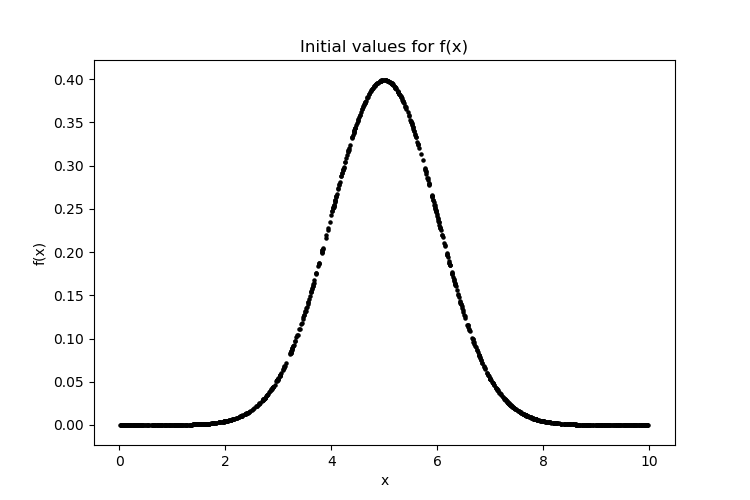

In [55]:
# plot the values of the function
fig, axs = plt.subplots(figsize=(7.5,5),num='Heat equation fig. 1')
axs.scatter(x,f,color='k',s=5)
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("Initial values for f(x)")
plt.show()

In [56]:
# let's create a DiffEQ object for the heat equation
h_eq = HeatEquation()
h_eq.set_alpha(1.0)
h_eq.set_scalarfield(s)

In [57]:
# let's generate a simple Runge-Kutta algorithm using the DiffEQ's methods
def rk4(steps=1,t=0,dt=.01):
    for k in range(steps):
        df_dx = []
        d2f_dx2 = []
        f_a = []
        f = s.get_field()
        for m in range(len(x)):
            neighbors = g.get_neighbors(m)
            x_neighbors = [x[b] for b in neighbors]
            f_neighbors = [f[b] for b in neighbors]
            array = [[x_neighbors[b],f_neighbors[b]] for b in range(len(x_neighbors))]
            b_matrix = s.get_Interpolator().construct_taylor_matrix(g,neighbors,m,n)
            v = Vector(f_neighbors)
            f_app = et.dgelsd(b_matrix,v)
            f_a.append(f_app[0])
            df_dx.append(f_app[1])
            d2f_dx2.append(f_app[2])
        f_new = [f[l] + dt*d2f_dx2[l] for l in range(len(x))]
        h_eq.get_scalarfield().set_field(f_new)

In [58]:
rk4(steps=10000,dt=.00001)

<IPython.core.display.Javascript object>


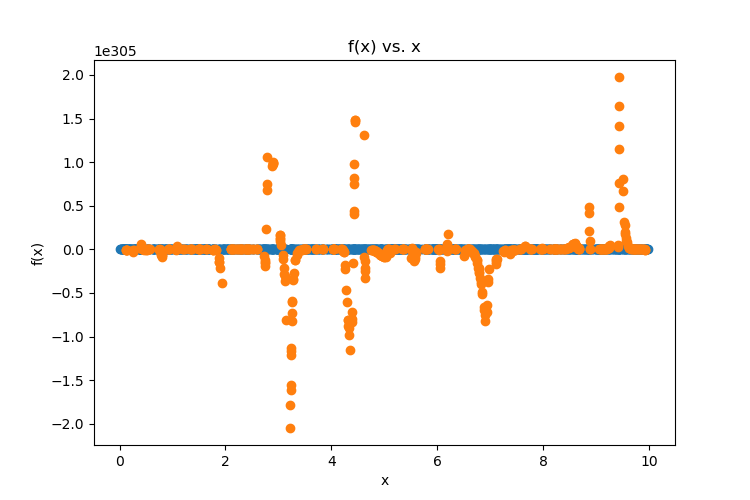

In [59]:
f_plot = s.get_field()
#dt = h_eq.dt(g.get_ugrid(),0,[0])
# plot the values of the function
fig, axs = plt.subplots(figsize=(7.5,5))
axs.scatter(x,f)
axs.scatter(x,f_plot)
#axs.scatter(x,dt)
axs.set_xlabel("x")
axs.set_ylabel("f(x)")
axs.set_title("f(x) vs. x")
plt.show()